# Logistic Regression

### Classification vs. Regression

---
- In the previous unit, you learned about one of the supervised learning tasks called  linear regression where the goal was to predict a continuous real value (Price of house ) .
  
- In this unit, you will learn about another type of supervised learning task called classification.

- In classification, we predict a discrete value .
  
-  We are actually predicting which class a sample belongs to based on its features. For example, predicting if a person has a disease or not based on his health information .Here, having the disease can be represented using a discrete value 1 and not having the disease can be represented using another discrete value of 0.

Similarly, here are some other simple examples of the classification problem :

  - **Predicting if an image is of a cat (0) or a dog (1),**  
  - **Predicting if a car will get sold (1) or not (0) based on the features and details of car,**  
  - **Classifying an email as spam (1) or not (0)**
  
#### Logistic regression is one of the basic classification algorithm.  

To better understand classification problems and logistic regression, we will start with a simple example. The example contains the SAT score of the students as a feature $x$ and a corresponding label $y$ with values 1 or 0 indicating the admission of the particular student to a university.
 
Here,
  
* 1 - The student gets admission
 
* 0 - The student does not get admission.



### Imports 

In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt



### Data

In [2]:


data_path = "https://drive.google.com/uc?export=download&id=1rLEMxfeaQc64RPiPDzXBy7ipI-R-kIlI"

#data_path= "https://github.com/Aashishrimal/Logistic-Regression-/"

# Read the CSV data from the link
data_frame = pd.read_csv(data_path)

# Printfirst 5 samples from the DataFrame
data_frame.head()


,SAT Score,Admitted
0,1102,0
1,1435,1
2,1270,0
3,1106,0
4,1071,0


  
Based on the dataset generated above, the task here is to predict if a student gets admission or not given their SAT Score. 
Initially lets plot the data .

### Data visulization 

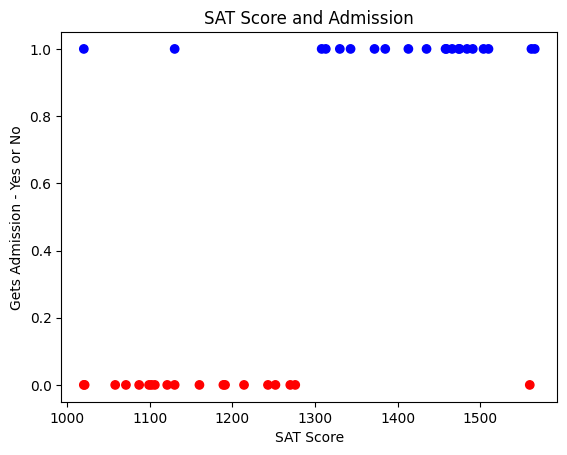

In [3]:
map_color = np.array(['r', 'b'])

x = data_frame.iloc[:, :-1].values
y = data_frame.iloc[:, 1].values

plt.scatter(data_frame['SAT Score'], data_frame['Admitted'], c=map_color[y])

plt.title('SAT Score and Admission')
plt.xlabel('SAT Score')
plt.ylabel('Gets Admission - Yes or No')
plt.savefig('sigmoid_data.png')
plt.show()



Initially lets see a function named Sigmoid Function.


$$f(z) = \frac 1 {(1+ e^{-z})} $$ $$    
       = \frac{e^z}{e^z + 1}  $$


 
where $z$ is any input real number. We can plot $f(z)$ as follows:

**Initially lets visualize a  function named Sigmoid function :**

<a data-flickr-embed="true" href="https://www.flickr.com/photos/200947226@N07/53845358796/in/dateposted-public/" title="sigmoid"><img src="https://live.staticflickr.com/65535/53845358796_f8714a4857_b.jpg" width="1024" height="307" alt="sigmoid"/></a><script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>

**Can you imagine fitting this graph  into the data mentioned in figure .?**

<div style="display: flex; justify-content: space-between;">
  <div style="margin-right: 10px;">
    <a data-flickr-embed="true" href="https://www.flickr.com/photos/200947226@N07/53847194057/in/dateposted-public/" title="sigmoid_data">
      <img src="https://live.staticflickr.com/65535/53847194057_fd1cf44f2e_z.jpg" width="320" height="240" alt="sigmoid_data"/>
    </a>
    <script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
  </div>
  <div>
    <a data-flickr-embed="true" href="https://www.flickr.com/photos/200947226@N07/53845358796/in/dateposted-public/" title="sigmoid">
      <img src="https://live.staticflickr.com/65535/53845358796_f8714a4857_b.jpg" width="790" height="240" alt="sigmoid"/>
    </a>
    <script async src="//embedr.flickr.com/assets/client-code.js" charset="utf-8"></script>
  </div>
</div>


**If we   shift the sigmoid graph 1300 unit towards right , it might fit into the dataset .**
### Lets visualize this .

### The code mentioned below is intended to be hidden . 

In [1]:

import numpy as np
import pandas as pd
import plotly.graph_objs as go
from ipywidgets import interactive, FloatSlider, VBox

# Generate synthetic data with sparse and dense regions around a decision point
np.random.seed(0)

# Parameters
n_samples_sparse = 20  # Number of samples around the decision point
n_samples_dense = 80   # Number of samples further away

# Generate sparse data around the decision point (30 grams)
weight_sparse_left = np.random.normal(28, 0.5, n_samples_sparse // 2)
weight_sparse_right = np.random.normal(32, 0.5, n_samples_sparse // 2)

# Generate dense data further away from the decision point
weight_dense_left = np.random.normal(20, 3, n_samples_dense // 2)
weight_dense_right = np.random.normal(40, 3, n_samples_dense // 2)

# Combine sparse and dense data
weights = np.concatenate([weight_sparse_left, weight_sparse_right, weight_dense_left, weight_dense_right])
obesity_status = np.concatenate([np.zeros(n_samples_sparse // 2), np.ones(n_samples_sparse // 2), 
                                 np.zeros(n_samples_dense // 2), np.ones(n_samples_dense // 2)])

# Add noise to the weights
noise = np.random.normal(0, 0.5, len(weights))
weights_noisy = weights + noise

# Add noise to the obesity status
flip_prob = 0.05  # Probability of flipping the obesity status
flip = np.random.rand(len(obesity_status)) < flip_prob
obesity_status_noisy = np.abs(obesity_status - flip)

# Shuffle the data
shuffle_idx = np.random.permutation(len(weights_noisy))
weights_noisy = weights_noisy[shuffle_idx]
obesity_status_noisy = obesity_status_noisy[shuffle_idx]

# Convert to pandas DataFrame for consistency with previous examples
data_frame = pd.DataFrame({'Weight': weights_noisy, 'Obesity': obesity_status_noisy})

# Print the first few rows to inspect the data
print(data_frame.head())

# Define the logistic function
def logistic_function(x, m, c):
    return 1 / (1 + np.exp(-(m * x + c)))

# Function to transform slider value to desired range for m
def transform_m(val):
    if val < 0:
        return -2 + (val + 2)**2 / 2
    elif val <= 4:
        return val
    else:
        return 4 + (val - 4)**2 / 2

# Function to update the graph
def update_graph(slider_m, c):
    m = transform_m(slider_m)
    x = np.linspace(-1000, 1000, 2000)
    y_pred = logistic_function(x, m, c)
    
    trace_model = go.Scatter(x=x, y=y_pred, mode='lines', name='Logistic Regression')
    trace_data = go.Scatter(x=data_frame['Weight'], y=data_frame['Obesity'], mode='markers', name='Data')
    
    layout = go.Layout(title='Interactive Logistic Regression', 
                       xaxis=dict(title='Mouse Weight (grams)', range=[-10, 50], autorange=False), 
                       yaxis=dict(title='Probability of Obesity', range=[-0.1, 1.1], fixedrange=True), 
                       showlegend=True)
    
    fig = go.Figure(data=[trace_model, trace_data], layout=layout)
    fig.show()

# Create a custom slider for m
slider_m = FloatSlider(value=0, min=-4, max=8, step=0.01, description=' (m):')
c_slider = FloatSlider(value=0, min=-60, max=60, step=0.1, description='(c):')

# Create interactive widget
interactive_plot = interactive(update_graph, slider_m=slider_m, c=c_slider)

# Display the interactive widget
VBox([interactive_plot])


      Weight  Obesity
0  41.075178      1.0
1  39.216839      1.0
2  15.562086      1.0
3  16.108712      0.0
4  14.500353      0.0


#### From the visualization above we get the following idea :  
#### We can make  change in value of m and c so as to best fit the sigmoid curve into the data.


**Lets make some changes in the sigmoid function.**


****$$f(z) = \frac 1 {(1+ e^{-z})} $$ $$    
       = \frac{e^z}{e^z + 1}  $$****


**On multiplying z by m**


****$$f(z) = \frac 1 {(1+ e^{-mz})} $$ $$    
       = \frac{e^{mz}}{e^{mz} + 1}  $$****




**Lets visualize the change in the graph on multiplying  z by m .**  
Add images showing for value of m = 1 and m =5 

***Now lets see what happens if we add c to m.z    
i.e (m\*z + c )***

**On adding c to  m.z**


****$$f(z) = \frac 1 {(1+ e^{-(mz+c)})} $$ $$    
       = \frac{e^{mz+c}}{e^{mz+c} + 1}  $$****




Add images showing for value of c = 0 and c =-30 


- Now you might be clear regarding how the change is made in simplest form of sigmoid function to make best fit.  
- But this work of finding the value of m and c to best fit the data is not performed by us ; it is the job of computer.  
- Computer finds the best value of m and c  using gradient descent similar  to  the way it's done in linear Regression  .  
- Instead of using SSE as loss in Linear Regression , we use Binary Cross Entroy Loss function .  

****Well ,  
What is Binary Cross Entropy Loss Function**** ? .  
For each data point , 

****$$ \mathcal{L}(y, \hat{y}) = -\left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right) $$****
 where ,  
 $y$ is the true label (either 0 or 1),

$\hat{y}$ is the predicted probability (output of the logistic function).  


      

### Total Loss : 
****$$ J  = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]$$****

Where ,   
*m is the number of training examples,*

*$y^{(i)}$ is the true label for the i-th example*

*$\hat{y}^{(i)}$ 
  is the predicted probability for the i-th example.*


##### Now the value of m and c is obtained using `Gradient Descent` so as to minimize the value of Total Loss.


 Animation ..  
 Left hand side  : gradient descent ..( flowing of red ball toward the minima )  
 Right hand side: fitting the sigmoid function in the data.

###Note...: Next Chapter  on Multiple classes and multiple features. 